In [3]:
import os
import jCMIP as jc
Clist = jc.readList(('CMIP6listnew'))

from netCDF4 import Dataset
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import cftime
%matplotlib inline

#### Historical overturning not corrected for BS throughflow

totmod
15.51629968643807 - 2.500798358057365
RAPID
16.9921153183877 - 5.1701030269812165
(array([52]),)
1030.6570834881636
944.271527300549 - 134.33322936931933
levmin:
(array([258]),)
5065.376067126172
4094.219923145156 - 340.9654705047


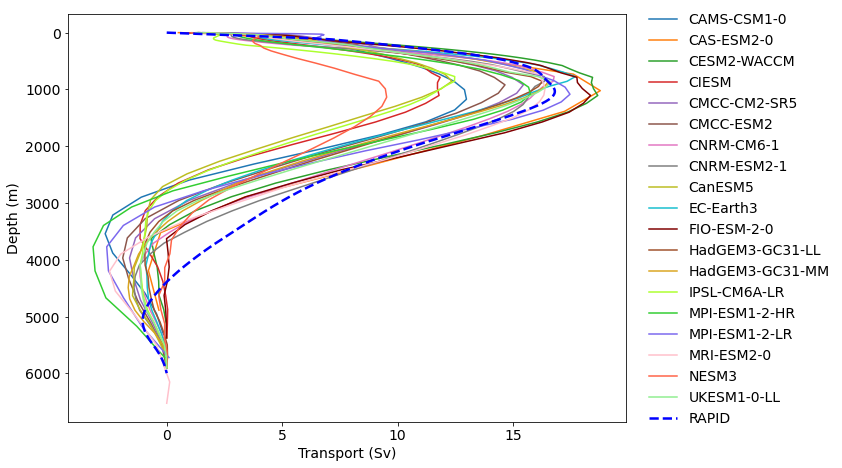

In [13]:
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r2i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']

plt.figure(1,figsize=(10,7.5))
plt.gca().set_prop_cycle(color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','maroon','sienna','goldenrod','greenyellow','limegreen','mediumslateblue','pink','tomato','lightgreen'])

mocmax = np.zeros(len(totmod))
levmax = np.zeros(len(totmod))
levmin = np.zeros(len(totmod))
for i in range (len(totmod)):
    outfile = ('/home/users/jordi/mocbt10.nc')
    ncid = Dataset(outfile,'r')
    mocbt = ncid.variables[totmod[i]][:]
    ncid.close()
    outfile1 = ('/home/users/jordi/section26data/' + totmod[i] + '_historical_' + ENS[i] + '.nc')
    ncid1 = Dataset(outfile1,'r')
    lev  = ncid1.variables['lev'][:]
    ncid1.close()
    mocmax[i] = max(mocbt)            #Maximum overturning
    a = np.where(mocbt == max(mocbt))
    a1 = a[0]
    a2 = a1[0]
    levmax[i] = lev[a2]               #Depth of maximum overturning
    b = np.where(mocbt == min(mocbt))
    b1 = b[0]
    b2 = b1[0]
    levmin[i] = lev[b2]               #Depth of minimum overturning (NADW - AABW boundary)
    plt.figure(1,figsize=(10,7.5))
    plt.plot(mocbt,lev,label=totmod[i])


outfile = ('/home/users/jordi/RAPID_data/moc_vertical.nc')
ncid = Dataset(outfile,'r')
sf = ncid.variables['stream_function_mar'][:,28:7822]         #Same start and end data as mocbt file
t = ncid.variables['time'][:]
z = ncid.variables['depth'][:]
ncid.close()

sfmean = np.nanmean(sf,axis=1)

sfmax = np.zeros(len(sf[0,:]))
for i in range (len(sf[0,:])):
    sfmax[i] = max(sf[:,i])

print('totmod')
print(str(np.nanmean(mocmax)) + ' - ' + str(np.std(mocmax)))
print('RAPID')
print(str(np.nanmean(sfmax)) + ' - ' + str(np.nanstd(sfmax)))
print(np.where(sfmean == max(sfmean)))
print(z[52])
print(str(np.nanmean(levmax)) + ' - ' + str(np.nanstd(levmax)))
print('levmin:')
print(np.where(sfmean == min(sfmean)))
print(z[258])
print(str(np.nanmean(levmin)) + ' - ' + str(np.nanstd(levmin)))

plt.figure(1,figsize=(10,7.5))
plt.plot(sfmean,z,'--',color='b',linewidth=2.5,label='RAPID')
plt.gca().invert_yaxis()
plt.xlabel('Transport (Sv)',fontsize=14)
plt.ylabel('Depth (m)',fontsize=14)
plt.xlabel('Transport (Sv)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 1.035),prop={'size': 14},frameon=False)

#### Historical overturning corrected for BS throughflow

totmod
14.566238738368297 - 2.438008960000283
RAPID
16.9921153183877 - 5.1701030269812165
(array([52]),)
1030.6570834881636
948.6562993503022 - 129.97209342520586
levmin:
(array([258]),)
5065.376067126172
3992.5546656410443 - 330.10286329038416


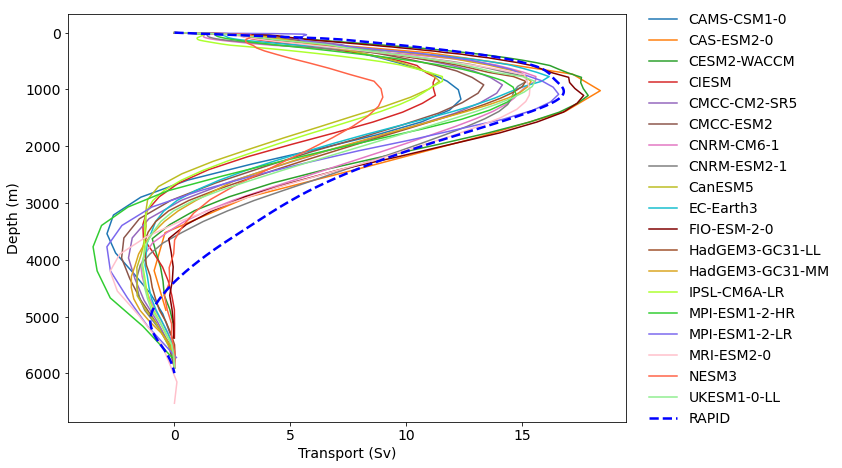

In [4]:
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r2i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']

plt.figure(1,figsize=(10,7.5))
plt.gca().set_prop_cycle(color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','maroon','sienna','goldenrod','greenyellow','limegreen','mediumslateblue','pink','tomato','lightgreen'])

mocmax = np.zeros(len(totmod))
levmax = np.zeros(len(totmod))
levmin = np.zeros(len(totmod))
for i in range (len(totmod)):
    outfile = ('/home/users/jordi/mocbt10_BS.nc')
    ncid = Dataset(outfile,'r')
    mocbt = ncid.variables[totmod[i]][:]
    ncid.close()
    outfile1 = ('/home/users/jordi/section26data/' + totmod[i] + '_historical_' + ENS[i] + '.nc')
    ncid1 = Dataset(outfile1,'r')
    lev  = ncid1.variables['lev'][:]
    ncid1.close()
    mocmax[i] = max(mocbt)              #Maximum overturning
    a = np.where(mocbt == max(mocbt))
    a1 = a[0]
    a2 = a1[0]
    levmax[i] = lev[a2]                 #Depth of maximum overturning
    b = np.where(mocbt == min(mocbt))
    b1 = b[0]
    b2 = b1[0]
    levmin[i] = lev[b2]                 #Depth of minimum overturning (NADW - AABW boundary)
    plt.figure(1,figsize=(10,7.5))
    plt.plot(mocbt,lev,label=totmod[i])

    
outfile = ('/home/users/jordi/RAPID_data/moc_vertical.nc')
ncid = Dataset(outfile,'r')
sf = ncid.variables['stream_function_mar'][:,28:7822]         #Same start and end date as mocbt file
t = ncid.variables['time'][:]
z = ncid.variables['depth'][:]
ncid.close()

sfmean = np.nanmean(sf,axis=1)

sfmax = np.zeros(len(sf[0,:]))
for i in range (len(sf[0,:])):
    sfmax[i] = max(sf[:,i])

print('totmod')
print(str(np.nanmean(mocmax)) + ' - ' + str(np.std(mocmax)))
print('RAPID')
print(str(np.nanmean(sfmax)) + ' - ' + str(np.nanstd(sfmax)))
print(np.where(sfmean == max(sfmean)))
print(z[52])
print(str(np.nanmean(levmax)) + ' - ' + str(np.nanstd(levmax)))
print('levmin:')
print(np.where(sfmean == min(sfmean)))
print(z[258])
print(str(np.nanmean(levmin)) + ' - ' + str(np.nanstd(levmin)))

plt.figure(1,figsize=(10,7.5))
plt.plot(sfmean,z,'--',color='b',linewidth=2.5,label='RAPID')
plt.gca().invert_yaxis()
plt.xlabel('Transport (Sv)',fontsize=14)
plt.ylabel('Depth (m)',fontsize=14)
plt.xlabel('Transport (Sv)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 1.035),prop={'size': 14},frameon=False)

#### SSP585 overturning (2090-2099) corrected for BS through flow

totmod
7.984650416338941 - 2.47981349902056
806.5009292972605 - 105.57623046292711
moc spread
9.802827623505747
levmin:
3260.851915256937 - 418.6418408737056


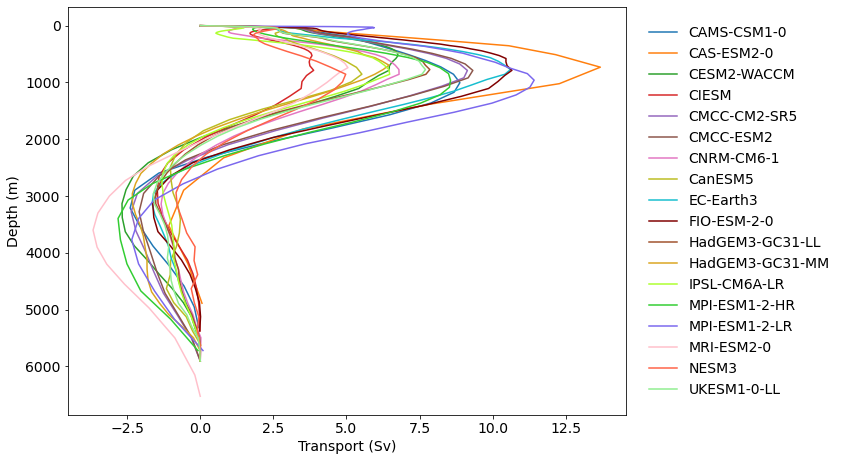

In [13]:
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']

plt.figure(1,figsize=(10,7.5))
plt.gca().set_prop_cycle(color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:olive','tab:cyan','maroon','sienna','goldenrod','greenyellow','limegreen','mediumslateblue','pink','tomato','lightgreen'])

mocmax = np.zeros(len(totmod))
levmax = np.zeros(len(totmod))
levmin = np.zeros(len(totmod))
for i in range (len(totmod)):
    outfile = ('/home/users/jordi/mocbt99_BS.nc')
    ncid = Dataset(outfile,'r')
    mocbt = ncid.variables[totmod[i]][:]
    ncid.close()
    outfile1 = ('/home/users/jordi/section26data/' + totmod[i] + '_ssp585_' + ENS[i] + '.nc')
    ncid1 = Dataset(outfile1,'r')
    lev  = ncid1.variables['lev'][:]
    ncid1.close()
    mocmax[i] = max(mocbt)            #Maximum overturning
    a = np.where(mocbt == max(mocbt))
    a1 = a[0]
    a2 = a1[0]
    levmax[i] = lev[a2]               #Depth of maximum overturning
    b = np.where(mocbt == min(mocbt))
    b1 = b[0]
    b2 = b1[0]
    levmin[i] = lev[b2]               #Depth of minimum overturning (NADW - AABW boundary)
    plt.figure(1,figsize=(10,7.5))
    plt.plot(mocbt,lev,label=totmod[i])
    
print('totmod')
print(str(np.nanmean(mocmax)) + ' - ' + str(np.std(mocmax)))
print(str(np.nanmean(levmax)) + ' - ' + str(np.nanstd(levmax)))
print('moc spread')
print(max(mocmax)-min(mocmax))
print('levmin:')
print(str(np.nanmean(levmin)) + ' - ' + str(np.nanstd(levmin)))

plt.figure(1,figsize=(10,7.5))
plt.gca().invert_yaxis()
plt.xlabel('Transport (Sv)',fontsize=14)
plt.ylabel('Depth (m)',fontsize=14)
plt.xlabel('Transport (Sv)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='center left',bbox_to_anchor=(1.02, 0.5),prop={'size': 14},frameon=False)